In [1]:
using CSV, DataFrames, Plots, Plots.PlotMeasures, StatsPlots, LaTeXStrings, Statistics

[ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
[ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
[ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]


In [12]:
raw = CSV.read("data_to_convert_to_table3.csv",DataFrame);
data = Matrix(raw);

In [13]:
df = DataFrame("FA-MSP" => data[:,4] , "Wait-and-see" => data[:,8], "S-2SSP" => data[:,11], "RH-2SSP" => data[:,15]);
matrix = Matrix(df);

In [21]:
rho = ["0.05", "0.5", "5"];
avg_data = Array{Float64, 2}(undef, 3, 4);
for r=1:length(rho)
    from = (r-1)*9+1
    to = (r-1)*9+9
    avg_data[r,:] = [mean(matrix[from:to,k]) for k=1:4] 
end
avg_data

3×4 Matrix{Float64}:
   2.73333    2.71111  519.278  637.2
  93.6556   131.289    472.844  554.656
 205.189    245.133    227.656  245.133

In [22]:
policies = ["FA-MSP","Wait-and-see","RH-2SSP","S-2SSP"];

In [27]:
p = groupedbar(
    rho,
    avg_data,
    xlabel=L"\nu",
    ylabel=L"\textrm{Gap}~(\%)~\textrm{on~average}",
    label=[policies[1] policies[2] policies[3] policies[4]],
    bar_position = :dodge,
    bar_width=0.7,
    color = [:red :yellow :lightgreen :blue],
    leg=(0.09,0.955),
    windowsize=(1000,550),
    xtickfontsize = 12,
    ytickfontsize = 12,
    guidefont=font(25),
    bottom_margin=10mm,
    left_margin=5mm,
    frame=:box,
    legendfontsize = 12,
    widen = true,
    legend=:topright,
    fmt = :png
    )
savefig(p, "./plots/averages/all_avg.png")


"/Users/local_ysong3/Documents/GitHub/msp_models_for_adaptive_disaster_relief_logistics_planning/random/results/plots/averages/all_avg.png"

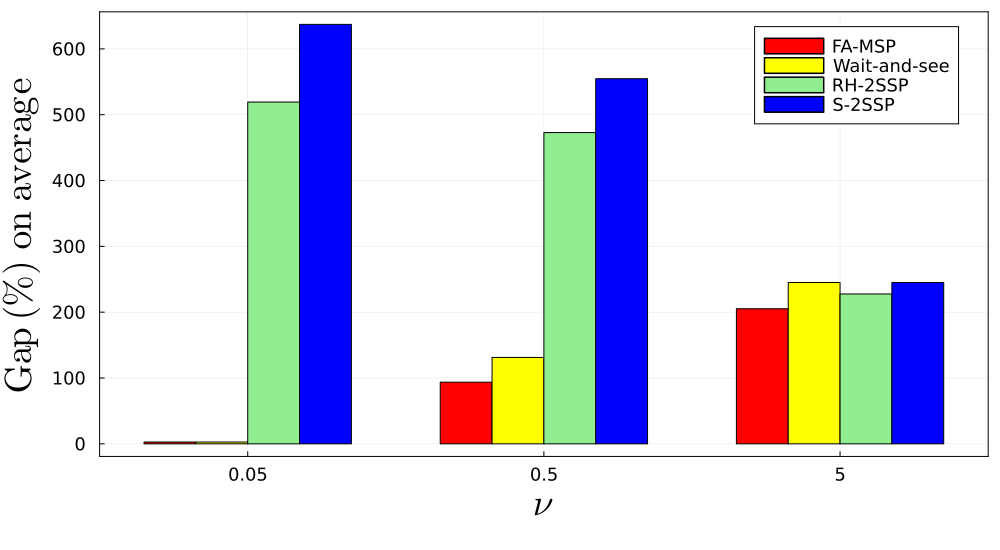

In [28]:
p

### 